# Q. The data set contains 416 liver patient records and 167 non liver patient records
collected from North East of Andhra Pradesh, India. The "Dataset" column is a
class label used to divide groups into liver patient (liver disease) or not (no disease).
This data set contains 441 male patient records and 142 female patient records. Any
patient whose age exceeded 89 is listed as being of age "90".
Attributes/Columns:
- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
<br>
Use these patient records to determine which patients have liver disease and which
<br>
ones do not. Perform the following operations:
1) Analyze the data
- Find out if there are any attributes with correlation more than 0.80
- Visualize the attributes using – Kernel density estimation (KDE/Histogram plots) – Write down your observations
2) Curate the data (if required)
- Identify the missing values and fill them with an appropriate method, if
<br>there are any missing values
<br>
3) Build a disease classifier using: 
i. Decision Tree
<br>
ii. Naive Bayes
<br>
iii. Random Forest
<br>
iv. Gradient Boost
<br>
v. XGBoost
<br>
vi. SVM
<br>
- Perform 5-fold cross validation
- Evaluate all the models using – accuracy, precision, recall and F1-Score,
<br>
Compare the results in a table as shown below and write down your
<br>
observations:
<br>
Algorithm Accuracy Precision Recall F1-Score
<br>
Decision Tree
<br>
Naive Bayes
<br>
Random Forest
<br>
Gradient Boost
<br>
XGBoost
<br>
SVM
- Store the results into a csv file.

In [1]:
import pandas as pd
import numpy as np

# For scaling the features and train-test split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# For model buidling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# For hyper-paramter tuning
# from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [2]:
# load the CSV file as a dataframe
df = pd.read_csv("/content/sample_data/indian_liver_patients.csv")

**Undersand the data**

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.shape

(583, 11)

In [9]:
df.Label.value_counts()

1    416
2    167
Name: Label, dtype: int64

In [10]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [11]:
df=df.fillna(method='bfill')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


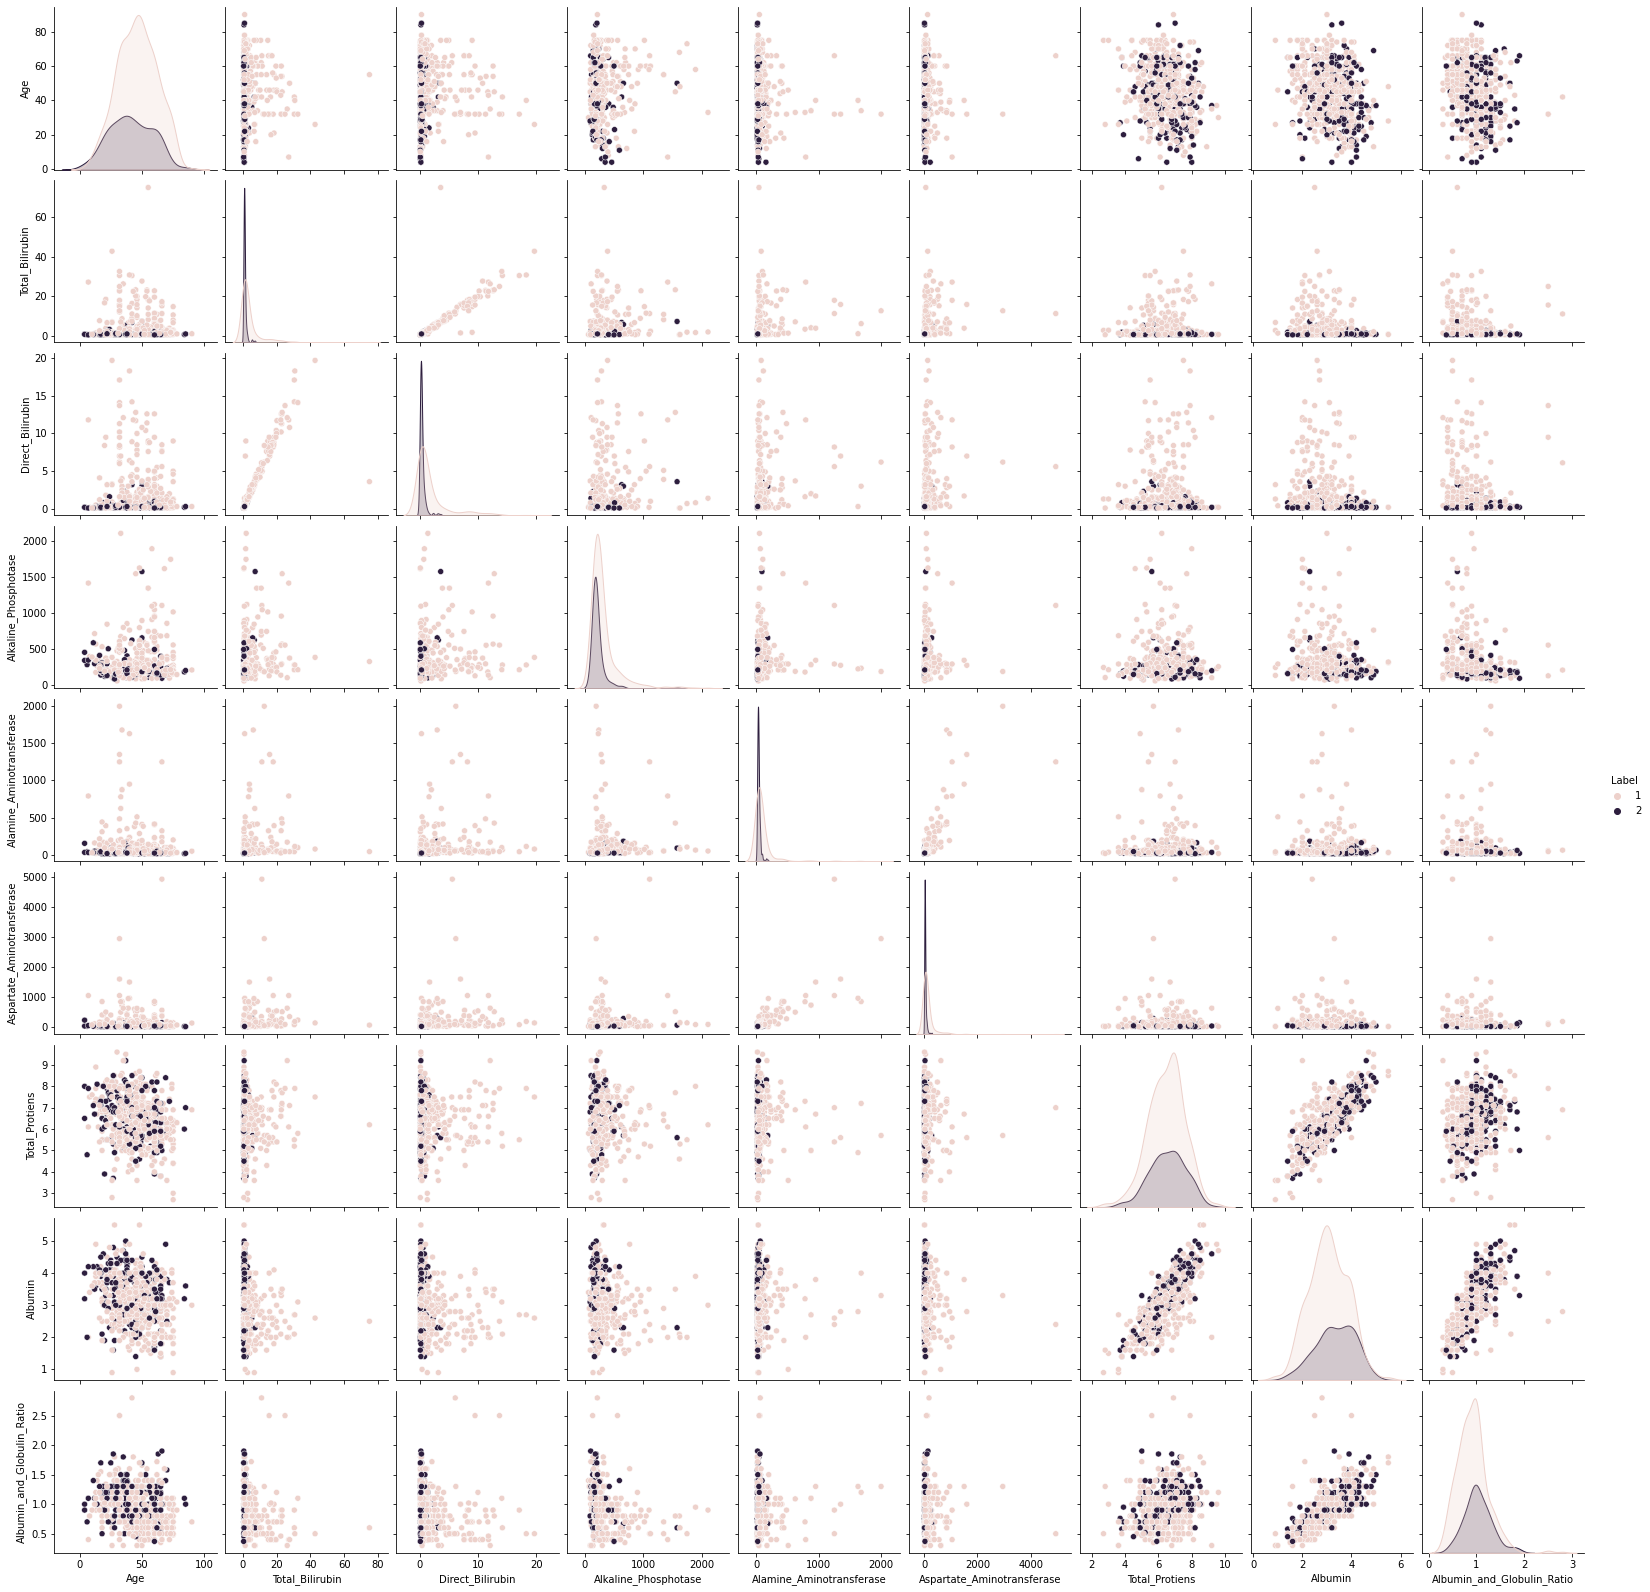

In [12]:
sns.pairplot(data=df,diag_kind='kde',hue='Label')

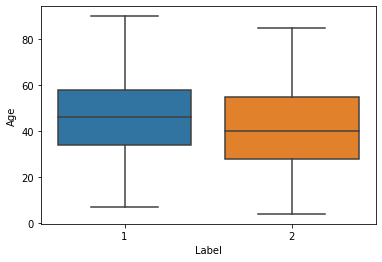

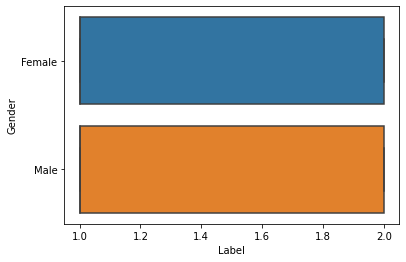

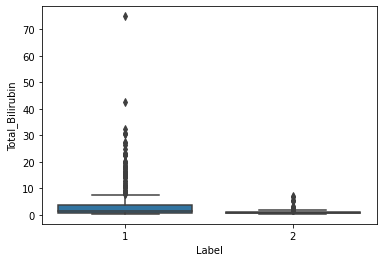

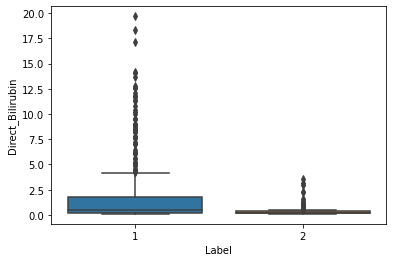

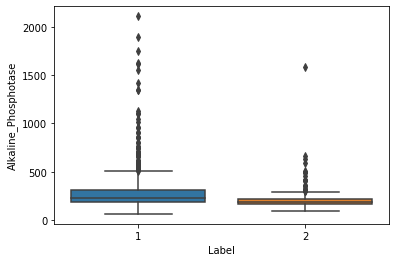

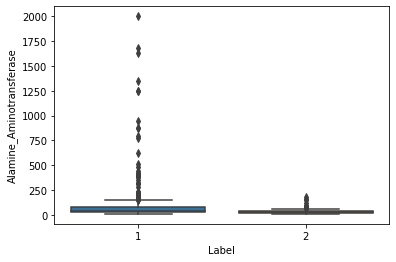

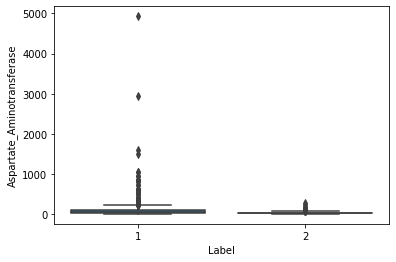

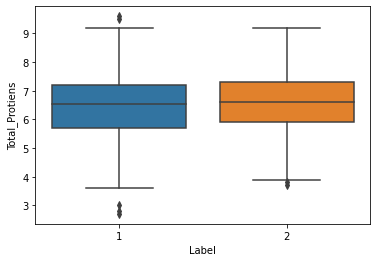

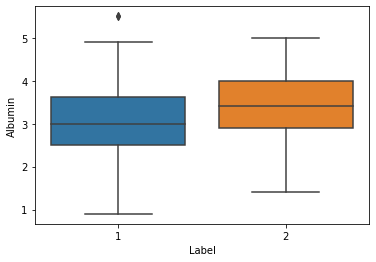

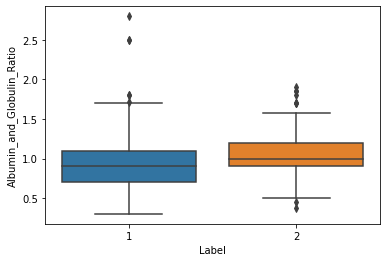

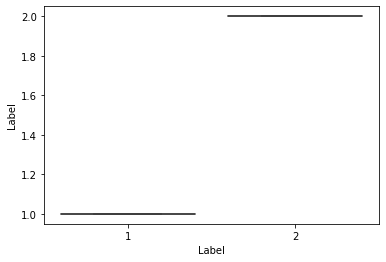

In [14]:
for i in df.columns:
    sns.boxplot(y=df[i],x=df['Label'])
    plt.show()

In [ ]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender_Male', ylabel='count'>

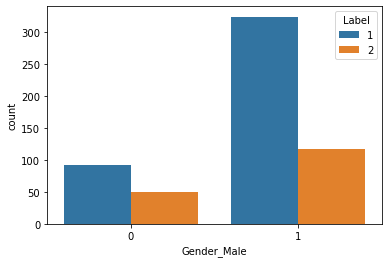

In [ ]:
sns.countplot(df['Gender_Male'],hue=df['Label'])

In [ ]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.218511,-0.137351,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207954,-0.220208,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201974,-0.246046,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.236543,-0.184866,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.004714,-0.163416,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.071585,-0.151934,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233764,0.035008,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.688138,0.161388,-0.093799
Albumin_and_Globulin_Ratio,-0.218511,-0.207954,-0.201974,-0.236543,-0.004714,-0.071585,0.233764,0.688138,1.000000,0.166694,-0.010719
Label,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.166694,1.000000,-0.082416


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Label                       583 non-null    int64  
 10  Gender_Male                 583 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score

In [ ]:
df1=df

In [ ]:
x=df1.drop('Label',axis=1)
y=df1['Label']

In [ ]:
from utils import predict_and_evaluate

In [ ]:
for train_index, test_index in ss.split(X, y):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

### Random Forest

In [ ]:
X_train = df1.drop('Label', axis=1)
y_train = df1['Label']

X_test = test_df.drop('Label', axis=1)
y_test = test_df['Label']

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion="entropy")

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
rf_clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=338544162)

In [ ]:
rf_res = predict_and_evaluate(rf_clf, X_test, y_test)

Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score,MCC
RandomForestClassifier,0,0,1,1,1,1


In [ ]:
rf_clf.feature_importances_

array([0.12795951, 0.10047051, 0.09236156, 0.13816992, 0.13351129,
       0.13352623, 0.08364223, 0.09103114, 0.08156798, 0.01775965])

In [ ]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

In [ ]:
feature_importances

Alkaline_Phosphotase          0.138170
Aspartate_Aminotransferase    0.133526
Alamine_Aminotransferase      0.133511
Age                           0.127960
Total_Bilirubin               0.100471
Direct_Bilirubin              0.092362
Albumin                       0.091031
Total_Protiens                0.083642
Albumin_and_Globulin_Ratio    0.081568
Gender_Male                   0.017760
dtype: float64

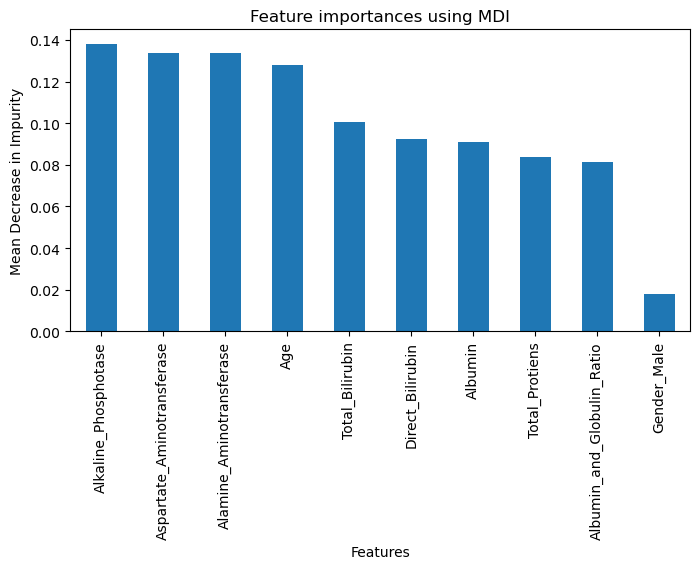

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)
feature_importances.plot.bar()
plt.title("Feature importances using MDI")
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

### Gradient Boosting

In [ ]:
gbm_clf = GradientBoostingClassifier()

In [ ]:
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gbm_res = predict_and_evaluate(gbm_clf, X_test, y_test)

Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score,MCC
GradientBoostingClassifier,2,13,0.86,0.98,0.92,0.68


### XGBoost

In [ ]:
xgb_clf = XGBClassifier()

In [ ]:
xgb_clf.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_res = predict_and_evaluate(xgb_clf, X_test, y_test)

Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score,MCC
XGBClassifier,0,0,1,1,1,1


### SVM

In [ ]:
svm_clf = SVC()

In [ ]:
svm_clf.fit(X_train, y_train)

SVC()

In [ ]:
svm_res = predict_and_evaluate(svm_clf, X_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score,MCC
SVC,0,34,0.71,1,0.83,0


## Comparing the metrics for all the algorithms

In [ ]:
results = pd.DataFrame(data=[rf_res, gbm_res, xgb_res, svm_res], 
             columns=('Algorithm','False Positives', 
                      'False Negatives', 'Precision', 
                      'Recall', 'F1 Score', 'MCC'))

,Algorithm,False Positives,False Negatives,Precision,Recall,F1 Score,MCC
0,RandomForestClassifier,0,0,1.00,1.00,1.00,1.00
1,GradientBoostingClassifier,2,13,0.86,0.98,0.92,0.68
2,XGBClassifier,0,0,1.00,1.00,1.00,1.00
3,SVC,0,34,0.71,1.00,0.83,0.00


In [ ]:
results.columns

Index(['Algorithm', 'False Positives', 'False Negatives', 'Precision',
       'Recall', 'F1 Score', 'MCC'],
      dtype='object')